In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Suspicious Patterns

## Data

In [3]:
trd = pd.read_csv('https://raw.githubusercontent.com/1712n/market-data-challenge/refs/heads/main/eth-btc-trades.csv')
trd.head()

,timestamp,price,size,side
0,2025-09-01 00:02:57+00:00,0.040800,0.000441,SELL
1,2025-09-01 00:02:57+00:00,0.040700,0.002478,SELL
2,2025-09-01 00:02:57+00:00,0.040700,0.020152,SELL
3,2025-09-01 00:02:57+00:00,0.040600,0.002460,SELL
4,2025-09-01 00:03:14+00:00,0.040812,91.455503,BUY


In [5]:
trd['timestamp'] = pd.to_datetime(trd['timestamp'])

In [10]:
trd.groupby('side').agg({
    'timestamp': 'count',
    'price': ['mean', 'min' , 'max'],
    'size': ['mean', 'min', 'max']
})

timestamp     price                           size                \
         count      mean      min       max        mean           min   
side                                                                    
BUY        720  0.039853  0.03892  0.041031  233.746948  5.600000e-07   
SELL       125  0.039702  0.03880  0.040961    0.007683  2.370000e-06   

                  
             max  
side              
BUY   687.329180  
SELL    0.191068

In [5]:
sell = trd[trd['side'] == 'SELL'].groupby('timestamp').sum()
buy = trd[trd['side'] == 'BUY'].groupby('timestamp').sum()

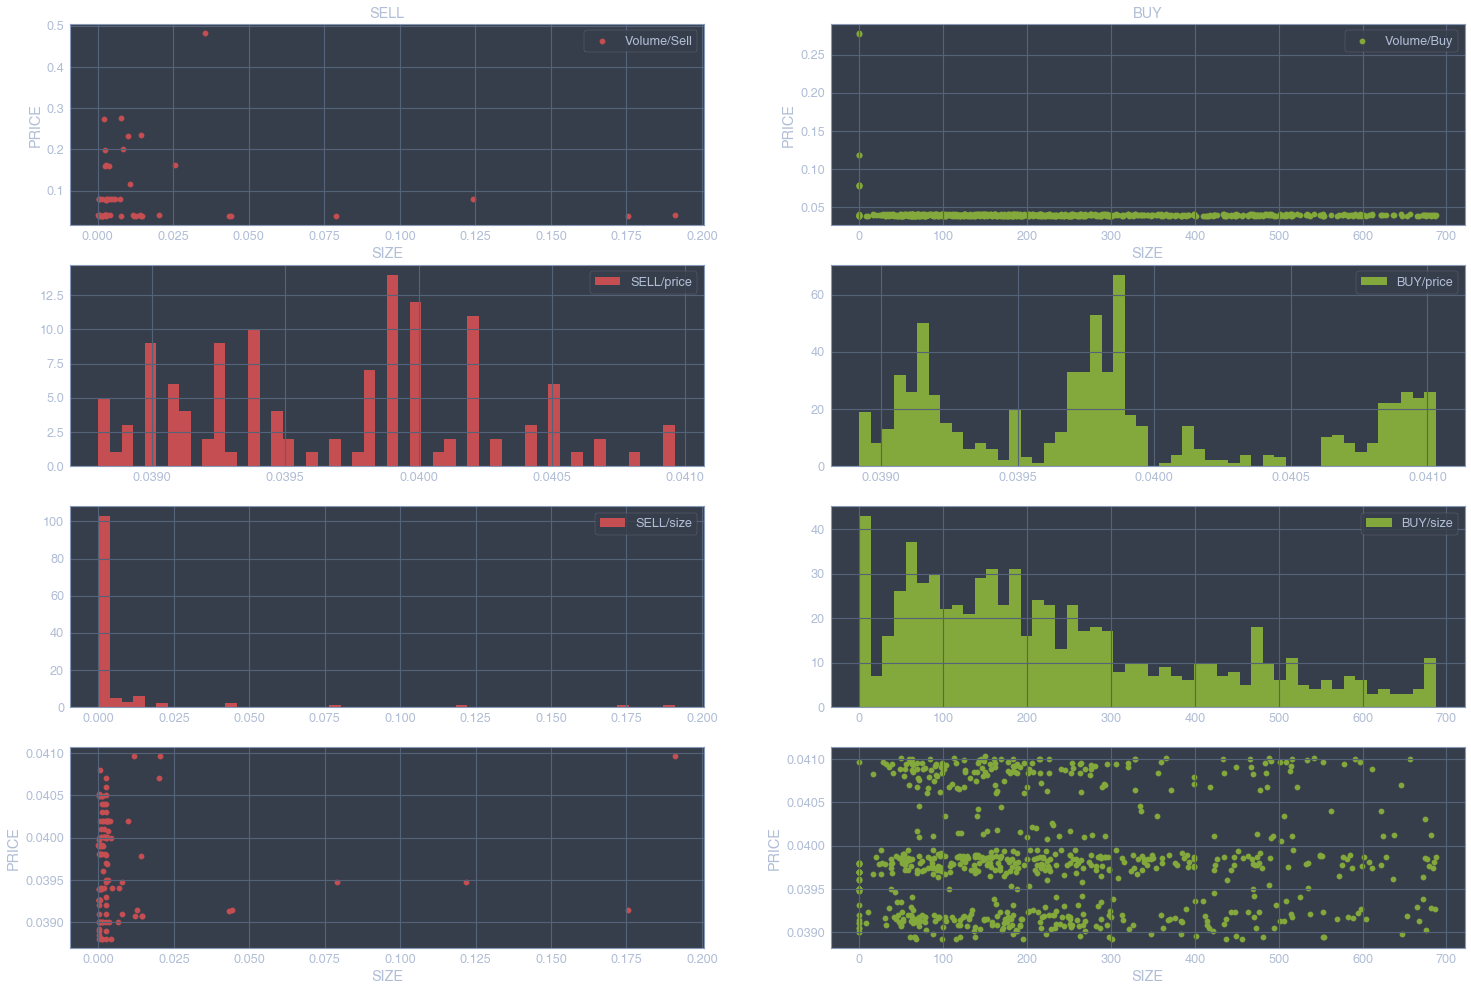

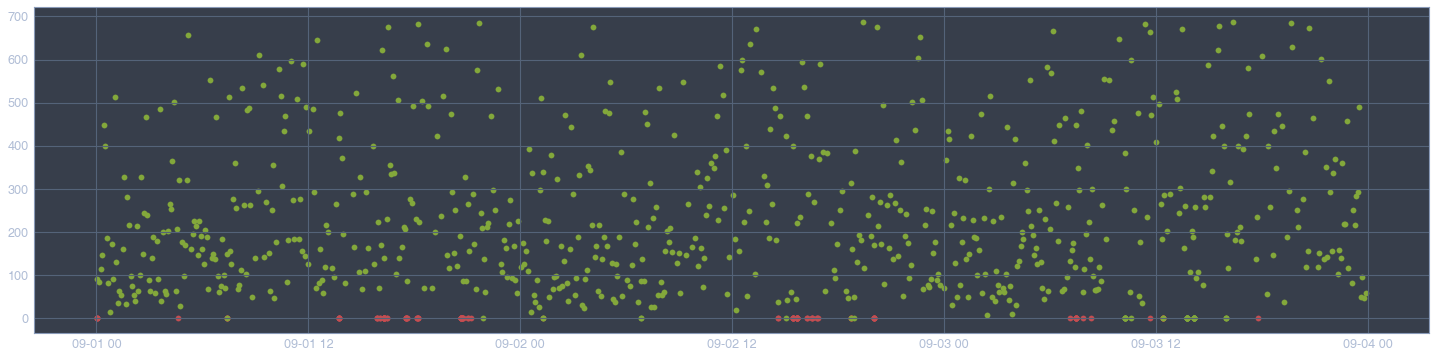

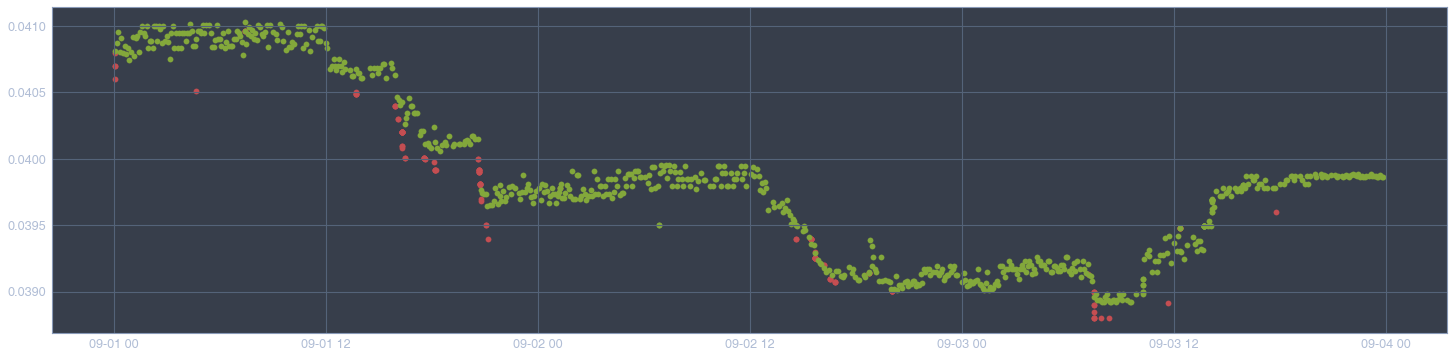

In [6]:
fig, ax = plt.subplots(4, 2, figsize=(25, 17))

ax[0, 0].scatter(sell['size'], sell['price'], label='Volume/Sell', c='r')
ax[0, 0].set_xlabel('SIZE')
ax[0, 0].set_ylabel('PRICE')
ax[0, 0].set_title('SELL')
ax[0, 0].legend()

ax[0, 1].scatter(buy['size'], buy['price'], label='Volume/Buy', c='g')
ax[0, 1].set_xlabel('SIZE')
ax[0, 1].set_ylabel('PRICE')
ax[0, 1].set_title('BUY')
ax[0, 1].legend()

ax[1, 0].hist(trd[trd['side'] == 'SELL']['price'], bins=50, label='SELL/price', color='r')
ax[1, 0].legend()
ax[1, 1].hist(trd[trd['side'] == 'BUY']['price'], bins=50, label='BUY/price', color='g')
ax[1, 1].legend()
ax[2, 0].hist(trd[trd['side'] == 'SELL']['size'], bins=50, label='SELL/size', color='r')
ax[2, 0].legend()
ax[2, 1].hist(trd[trd['side'] == 'BUY']['size'], bins=50, label='BUY/size', color='g')
ax[2, 1].legend();

ax[3, 0].scatter(trd[trd['side'] == 'SELL']['size'], trd[trd['side'] == 'SELL']['price'], c='r')
ax[3, 0].set_xlabel('SIZE')
ax[3, 0].set_ylabel('PRICE')

ax[3, 1].scatter(trd[trd['side'] == 'BUY']['size'], trd[trd['side'] == 'BUY']['price'], c='g')
ax[3, 1].set_xlabel('SIZE')
ax[3, 1].set_ylabel('PRICE')


plt.figure(figsize=(25, 6))
plt.scatter(trd[trd['side'] == 'SELL']['timestamp'], trd[trd['side'] == 'SELL']['size'], c='r')
plt.scatter(trd[trd['side'] == 'BUY']['timestamp'], trd[trd['side'] == 'BUY']['size'], c='g')

plt.figure(figsize=(25, 6))
plt.scatter(trd[trd['side'] == 'SELL']['timestamp'], trd[trd['side'] == 'SELL']['price'], c='r')
plt.scatter(trd[trd['side'] == 'BUY']['timestamp'], trd[trd['side'] == 'BUY']['price'], c='g')

In [31]:
buy[(buy['timestamp']>='2025-09-02') & (buy['timestamp']<'2025-09-02 12')].sort_values('price')[:5]

,timestamp,price,size,side
385,2025-09-02 06:49:17+00:00,0.039504,0.000013,BUY
384,2025-09-02 06:49:16+00:00,0.039504,0.006531,BUY
317,2025-09-02 01:02:00+00:00,0.039667,25.418717,BUY
312,2025-09-02 00:35:42+00:00,0.039667,15.894197,BUY
307,2025-09-02 00:08:49+00:00,0.039687,175.316590,BUY


In [32]:
buy[(buy['timestamp']>='2025-09-02') & (buy['timestamp']<'2025-09-02 12')].sort_values('size')[:5]

,timestamp,price,size,side
385,2025-09-02 06:49:17+00:00,0.039504,0.000013,BUY
384,2025-09-02 06:49:16+00:00,0.039504,0.006531,BUY
320,2025-09-02 01:15:58+00:00,0.039784,0.009729,BUY
321,2025-09-02 01:15:58+00:00,0.039784,0.011321,BUY
312,2025-09-02 00:35:42+00:00,0.039667,15.894197,BUY


In [12]:
buy = trd[trd['side'] == 'BUY'].copy()
sell = trd[trd['side'] == 'SELL'].copy()

In [8]:
trd[trd['side'] == 'BUY'].sort_values('size')[:10]

,timestamp,price,size,side
702,2025-09-03 10:15:41+00:00,0.039100,5.600000e-07,BUY
700,2025-09-03 10:15:05+00:00,0.039050,8.200000e-07,BUY
698,2025-09-03 10:14:36+00:00,0.039000,2.090000e-06,BUY
758,2025-09-03 14:10:23+00:00,0.039692,1.174000e-05,BUY
385,2025-09-02 06:49:17+00:00,0.039504,1.309000e-05,BUY
745,2025-09-03 13:43:46+00:00,0.039497,5.333000e-05,BUY
746,2025-09-03 13:43:46+00:00,0.039497,2.072500e-04,BUY
285,2025-09-01 21:51:51+00:00,0.039801,2.512500e-04,BUY
697,2025-09-03 10:14:35+00:00,0.039000,2.582100e-04,BUY
701,2025-09-03 10:15:41+00:00,0.039100,2.590800e-04,BUY


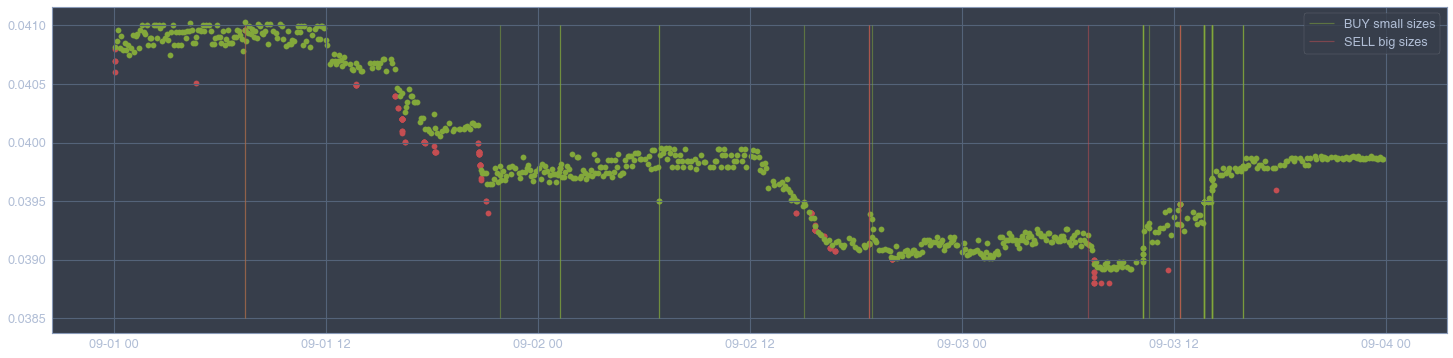

In [31]:
BUY_small_size_idxs = trd[trd['side'] == 'BUY'][trd[trd['side'] == 'BUY']['size']<.1]['timestamp']
SELL_big_size_idxs = trd[trd['side'] == 'SELL'][trd[trd['side'] == 'SELL']['size']>.025]['timestamp']

plt.figure(figsize=(25, 6))
plt.scatter(trd[trd['side'] == 'SELL']['timestamp'], trd[trd['side'] == 'SELL']['price'], c='r')
plt.scatter(trd[trd['side'] == 'BUY']['timestamp'], trd[trd['side'] == 'BUY']['price'], c='g')
plt.vlines(BUY_small_size_idxs, ymin=0.0385, ymax=0.041, color='g', alpha=.5, label='BUY small sizes')
plt.vlines(SELL_big_size_idxs, ymin=0.0385, ymax=0.041, color='r', alpha=.5, label='SELL big sizes')
plt.legend()

In [36]:
trd.head(20)

,timestamp,price,size,side
0,2025-09-01 00:02:57+00:00,0.040800,0.000441,SELL
1,2025-09-01 00:02:57+00:00,0.040700,0.002478,SELL
2,2025-09-01 00:02:57+00:00,0.040700,0.020152,SELL
3,2025-09-01 00:02:57+00:00,0.040600,0.002460,SELL
4,2025-09-01 00:03:14+00:00,0.040812,91.455503,BUY
5,2025-09-01 00:08:49+00:00,0.040869,85.347000,BUY
6,2025-09-01 00:13:49+00:00,0.040957,114.864740,BUY
7,2025-09-01 00:19:13+00:00,0.040805,147.560910,BUY
8,2025-09-01 00:24:32+00:00,0.040907,449.285400,BUY
9,2025-09-01 00:30:06+00:00,0.040794,399.330000,BUY


## Data

In [2]:
ob = pd.read_csv('https://raw.githubusercontent.com/1712n/market-data-challenge/refs/heads/main/eth-btc-orderbooks.csv')
ob.head()

,timestamp,asks,bids
0,2025-09-01 00:13:09.511132300+00:00,"[{'price': 0.04100829, 'size': 0.02288708}, {'...","[{'price': 0.0405, 'size': 0.00249086}, {'pric..."
1,2025-09-01 00:31:23.134173200+00:00,"[{'price': 0.04097411, 'size': 0.02047798}, {'...","[{'price': 0.0405, 'size': 0.00249086}, {'pric..."
2,2025-09-01 00:49:37.173137500+00:00,"[{'price': 0.04091134, 'size': 0.02229217}, {'...","[{'price': 0.0405, 'size': 0.00249086}, {'pric..."
3,2025-09-01 01:07:51.274078600+00:00,"[{'price': 0.04103079, 'size': 0.07205901}, {'...","[{'price': 0.0405, 'size': 0.00249086}, {'pric..."
4,2025-09-01 01:26:07.248503+00:00,"[{'price': 0.04100837, 'size': 0.02019721}, {'...","[{'price': 0.0405, 'size': 0.00249086}, {'pric..."


In [8]:
ob.shape

(188, 3)

In [3]:
import ast
from pandas import json_normalize

df = ob['asks'].apply(ast.literal_eval).apply(pd.Series).copy()
df['timestamp'] = ob['timestamp']

result = df.melt(id_vars=['timestamp'], 
                 value_vars=df.columns[:-1],
                 value_name='value')
result.drop('variable', axis=1, inplace=True)

asks = pd.concat([result['timestamp'], json_normalize(result['value'])], axis=1)
asks.head()

,timestamp,price,size
0,2025-09-01 00:13:09.511132300+00:00,0.041008,0.022887
1,2025-09-01 00:31:23.134173200+00:00,0.040974,0.020478
2,2025-09-01 00:49:37.173137500+00:00,0.040911,0.022292
3,2025-09-01 01:07:51.274078600+00:00,0.041031,0.072059
4,2025-09-01 01:26:07.248503+00:00,0.041008,0.020197


In [4]:
df = ob['bids'].apply(ast.literal_eval).apply(pd.Series).copy()
df['timestamp'] = ob['timestamp']

result = df.melt(id_vars=['timestamp'], 
                 value_vars=df.columns[:-1],
                 value_name='value')
result.drop('variable', axis=1, inplace=True)

bids = pd.concat([result['timestamp'], json_normalize(result['value'])], axis=1)
bids.head()

,timestamp,price,size
0,2025-09-01 00:13:09.511132300+00:00,0.0405,0.002491
1,2025-09-01 00:31:23.134173200+00:00,0.0405,0.002491
2,2025-09-01 00:49:37.173137500+00:00,0.0405,0.002491
3,2025-09-01 01:07:51.274078600+00:00,0.0405,0.002491
4,2025-09-01 01:26:07.248503+00:00,0.0405,0.002491


In [29]:
asks.shape, bids.shape

((9400, 3), (9400, 3))

In [8]:
asks['timestamp'] = pd.to_datetime(asks['timestamp'])
bids['timestamp'] = pd.to_datetime(bids['timestamp'])

In [9]:
asks.dtypes

timestamp    datetime64[ns, UTC]
price                    float64
size                     float64
dtype: object

In [10]:
bids.dtypes

timestamp    datetime64[ns, UTC]
price                    float64
size                     float64
dtype: object

In [21]:
# USELESS ???
# obdf = pd.merge(asks, bids, on='timestamp', how='inner', suffixes=('_asks', '_bids'))
# obdf.head()

,timestamp,price_asks,size_asks,price_bids,size_bids
0,2025-09-01 00:13:09.511132300+00:00,0.041008,0.022887,0.04050,0.002491
1,2025-09-01 00:13:09.511132300+00:00,0.041008,0.022887,0.04049,0.002874
2,2025-09-01 00:13:09.511132300+00:00,0.041008,0.022887,0.04040,0.003743
3,2025-09-01 00:13:09.511132300+00:00,0.041008,0.022887,0.04030,0.004230
4,2025-09-01 00:13:09.511132300+00:00,0.041008,0.022887,0.04020,0.002510


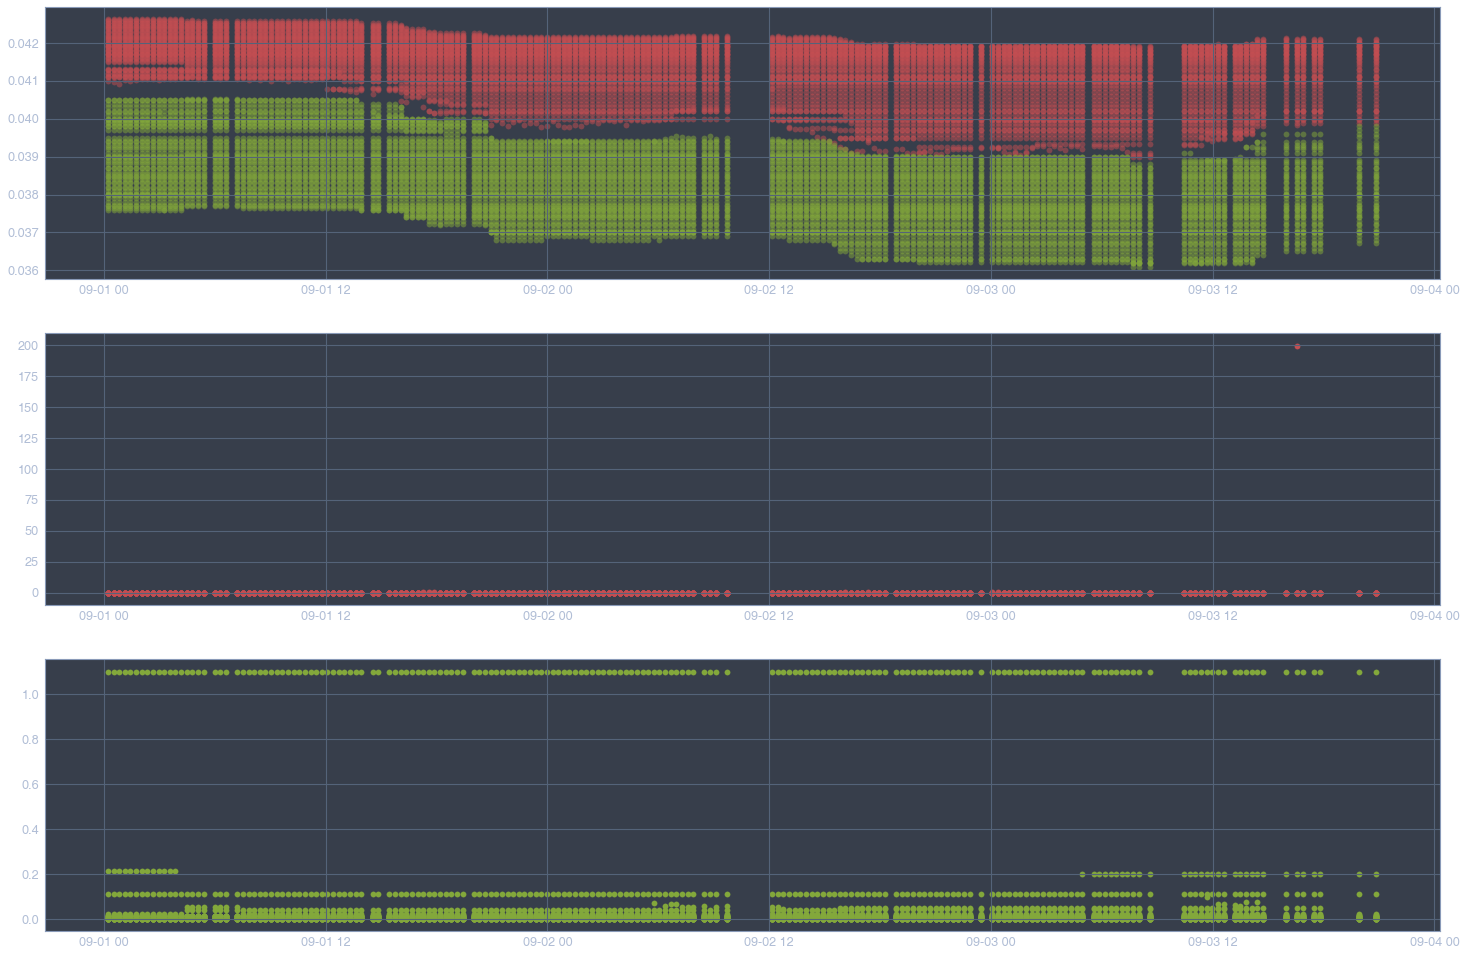

In [32]:
fig, ax = plt.subplots(3, 1, figsize=(25, 17))

ax[0].scatter(asks['timestamp'], asks['price'], c='r', alpha=.5)
ax[0].scatter(bids['timestamp'], bids['price'], c='g', alpha=.5)

ax[1].scatter(asks['timestamp'], asks['size'], c='r')
ax[2].scatter(bids['timestamp'], bids['size'], c='g')